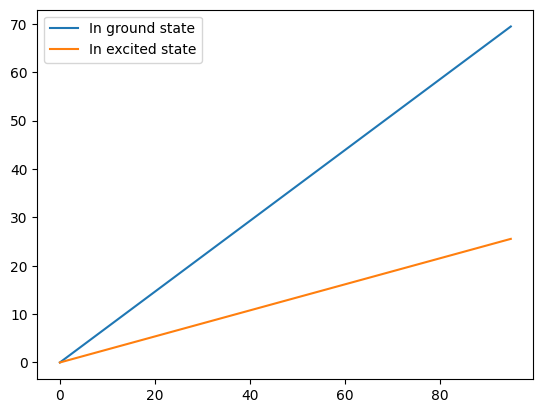

In [8]:
#Part c, calculate average occupation of the ground state

import numpy as np
import scipy.special
import matplotlib.pyplot as plt

def get_nground(N):
    nground = 0
    beta = 1
    epsilon = 1

    #first calculate the partition function to normalize:
    Z = 0
    for i in range(N+1):
        Z += scipy.special.comb(N, i) * np.exp(-beta*(i*epsilon))

    nground = 0
    for i in range(N+1):
        nground += (N-i) * scipy.special.comb(N, i) * np.exp(-beta*(i*epsilon))

    return(nground/Z)


Nvals = np.arange(0,100,5)
nground_vals = [get_nground(N) for N in Nvals]

plt.plot(Nvals, nground_vals, label='In ground state')

plt.plot(Nvals, Nvals - nground_vals, label='In excited state')
plt.legend()
plt.show()


d) For the quantum case, we'll assume particles are indistinguishable. I don't understand what Zihang was talking about in class about number phase uncertainty so I'll just stick with this.

\begin{equation}
Z = 1 + e^{-\beta \epsilon} + e^{-2 \beta \epsilon} ... N
\end{equation}

This is a geometric series, the answer is: 

\begin{equation}
Z = (1 - e^{-\beta \epsilon N}) / 1- e^{\beta \epsilon}
\end{equation}






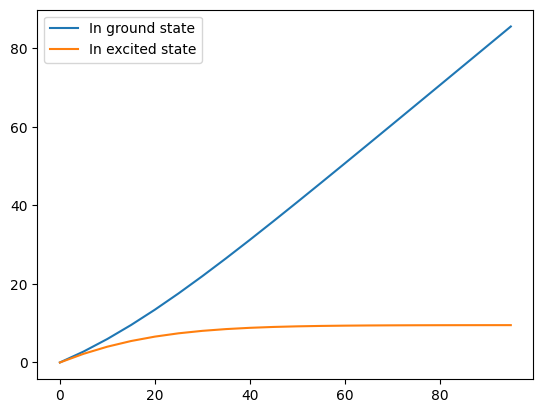

In [12]:
#Part d, quantum case

import numpy as np
import scipy.special
import matplotlib.pyplot as plt

def get_nground(N):
    nground = 0
    beta = 0.1
    epsilon = 1

    #first calculate the partition function to normalize:
    Z = 0
    for i in range(N+1):
        Z +=  np.exp(-beta*(i*epsilon))

    nground = 0
    for i in range(N+1):
        nground += (N-i) *  np.exp(-beta*(i*epsilon))

    return(nground/Z)


Nvals = np.arange(0,100,5)
nground_vals = [get_nground(N) for N in Nvals]

plt.plot(Nvals, nground_vals, label='In ground state')

plt.plot(Nvals, Nvals - nground_vals, label='In excited state')
plt.legend()
plt.show()

/tmp/ipykernel_1707/3839306695.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (np.exp((E - mu) / (kB * T)) - 1)


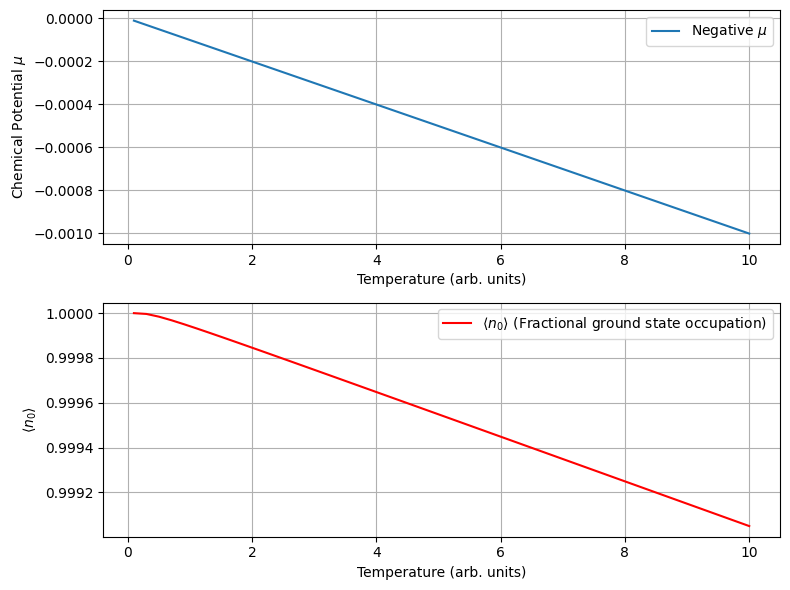

In [19]:
#f) Code from chatgpt

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Constants
N = 10**4  # Number of bosons
epsilon = 1.0  # Excited state energy level
kB = 1.0   # Boltzmann constant (J/K)
T_vals = np.linspace(0.1, 10, 50)  # Temperature range (in arbitrary units)

def bose_einstein(E, mu, T):
    """Returns the occupation number for a given energy E."""
    return 1 / (np.exp((E - mu) / (kB * T)) - 1)

def solve_mu(T):
    """Solves for the chemical potential µ at a given temperature T."""
    def constraint(mu):
        n0 = bose_einstein(0, mu, T)
        n1 = bose_einstein(epsilon, mu, T)
        return n0 + n1 - N  # Must sum to total number of bosons
    
    # µ must be negative, so search in a range below 0
    return bisect(constraint, -0.1, 0)  

# Compute µ and ⟨n0⟩ for each temperature
mu_vals = []
n0_vals = []

for T in T_vals:
    mu = solve_mu(T)
    n0 = bose_einstein(0, mu, T)
    
    mu_vals.append(mu)
    n0_vals.append(n0)

# Convert lists to arrays
mu_vals = np.array(mu_vals)
n0_vals = np.array(n0_vals)

# Plot results
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(T_vals, mu_vals, label=r"Negative $\mu$")
plt.xlabel("Temperature (arb. units)")
plt.ylabel("Chemical Potential $\mu$")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(T_vals, n0_vals/N, label=r"$\langle n_0 \rangle$ (Fractional ground state occupation)", color='r')
plt.xlabel("Temperature (arb. units)")
plt.ylabel(r"$\langle n_0 \rangle$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
